In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("poly.csv")

In [3]:
data.head()

,zaman,sicaklik
0,1,0
1,3,9
2,5,20
3,10,35
4,15,60


In [4]:
x=data.iloc[:,0].values.reshape(-1,1)
y=data.iloc[:,1].values.reshape(-1,1)

In [5]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [6]:
lr.fit(x,y)

LinearRegression()

In [7]:
yhead=lr.predict(x)

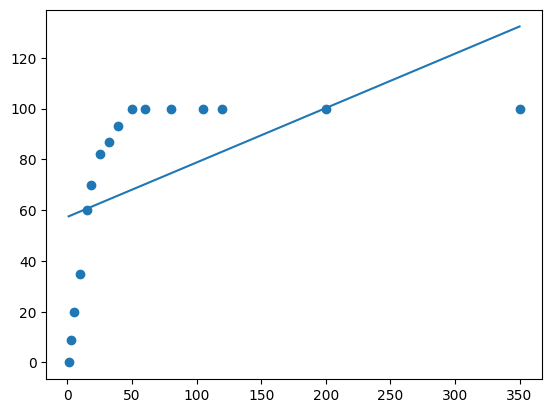

In [8]:
plt.scatter(x,y)
plt.plot(x,yhead)   #when we do linear regression, 
#the plot we draw coincided with only 2 points, so it is very difficult to find it, so we should apply polynomial regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)   #default value is 2, as you increase the degree, it can go to overfitting, you need to find the right value!!!

In [10]:
xpl=pr.fit_transform(x)

In [11]:
xpl

array([[1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 3.0000e+00, 9.0000e+00],
       [1.0000e+00, 5.0000e+00, 2.5000e+01],
       [1.0000e+00, 1.0000e+01, 1.0000e+02],
       [1.0000e+00, 1.5000e+01, 2.2500e+02],
       [1.0000e+00, 1.8000e+01, 3.2400e+02],
       [1.0000e+00, 2.5000e+01, 6.2500e+02],
       [1.0000e+00, 3.2000e+01, 1.0240e+03],
       [1.0000e+00, 3.9000e+01, 1.5210e+03],
       [1.0000e+00, 5.0000e+01, 2.5000e+03],
       [1.0000e+00, 6.0000e+01, 3.6000e+03],
       [1.0000e+00, 8.0000e+01, 6.4000e+03],
       [1.0000e+00, 1.0500e+02, 1.1025e+04],
       [1.0000e+00, 1.2000e+02, 1.4400e+04],
       [1.0000e+00, 2.0000e+02, 4.0000e+04],
       [1.0000e+00, 3.5000e+02, 1.2250e+05]])

In [12]:
lr2=LinearRegression()
lr2.fit(xpl,y)

LinearRegression()

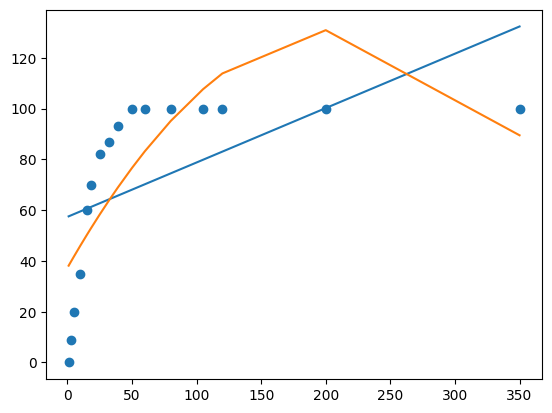

In [13]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x))
plt.plot(x,lr2.predict(xpl))

In [14]:
yhead=lr2.predict(xpl)

In [15]:
yhead

array([[ 38.13277258],
       [ 39.90291739],
       [ 41.65604962],
       [ 45.96445014],
       [ 50.166522  ],
       [ 52.63672737],
       [ 58.25167977],
       [ 63.65822802],
       [ 68.8563721 ],
       [ 76.60382276],
       [ 83.20037938],
       [ 95.11754878],
       [107.62161583],
       [113.84811222],
       [130.89413763],
       [ 89.48866441]])

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
ypred_lineer = lr.predict(x)
rmse_lineer=np.sqrt(mean_squared_error(y,ypred_lineer))
r2_lineer=r2_score(y,ypred_lineer)
print(f"lineer regression rmse{rmse_lineer}, r2{r2_lineer}")

lineer regression rmse29.370307035713182, r20.29679324573531307


In [17]:
rmse_poly=np.sqrt(mean_squared_error(y,yhead))
r2_poly=r2_score(y,yhead)
print(f"poly regression rmse {rmse_poly}, r2 {r2_poly}")

poly regression rmse 21.29621514909468, r2 0.6302817305332207


In [18]:
new_value = np.array([[26]])   #niye 2 köşeli parantez?? çünkü 2 boyutlu matrixten bahsediyoruz aslında
new_transformed=pr.transform(new_value)
prediction_value=lr2.predict(new_transformed)
print("at 26.second temp:", prediction_value)

at 26.second temp: [[59.03680325]]
